In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [2]:
X = pd.read_csv('train/train.csv')

Dataset is splitted to obtain a validation set, needed to perform the validation loss/accuracy(give us a realistic error/accuracy).

In [3]:
X_train = X.sample(frac=0.7, random_state=0)
X_val = X.drop(X_train.index)

y_train = X_train.pop('label')
y_val = X_val.pop('label')

28 x 28 images are given as a flatten array of length 28*28.

In [4]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Labels are numerical, whose range is (0,9).

In [5]:
y_train.head()

16275    3
19204    6
18518    9
25780    5
16228    6
Name: label, dtype: int64

In [6]:
X_val.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_val.head()

5     0
10    8
11    9
13    3
14    3
Name: label, dtype: int64

29400 images for the train set.

In [8]:
X_train.shape

(29400, 784)

12600 images for the test set.

In [9]:
X_val.shape

(12600, 784)

Datasets are converted into np.array, needed to feed the NN. Moreover, the labels need to be in categorical form

The datasets reshape to (28,28) is done just to see the ease of changing this approach to one using CNN's as the core of the predictive model. Due to this reshape, further when building the model a flatten layer will be needed.

In [10]:
X_train = np.asarray(X_train)
X_train = X_train.reshape(29400, 28, 28)

X_val = np.asarray(X_val)
X_val = X_val.reshape(12600,28,28)

y_train = np.asarray(y_train)
y_train = to_categorical(y_train, num_classes=10, dtype='int')

y_val = np.asarray(y_val)
y_val = to_categorical(y_val, num_classes=10, dtype='int')

A kind of "normalization" of the arrays(images) feeded to the NN. Instead of working in a range (0,255), it's better to work within range (0,1).

In [11]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test /255

In [12]:
X_train.shape

(29400, 28, 28)

How images and labels used to train the model looks like.

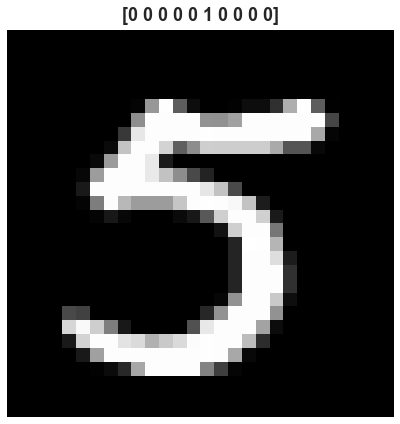

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[3], cmap='gray')
plt.axis('off')
plt.title('{}'.format(y_train[3]))
plt.show();

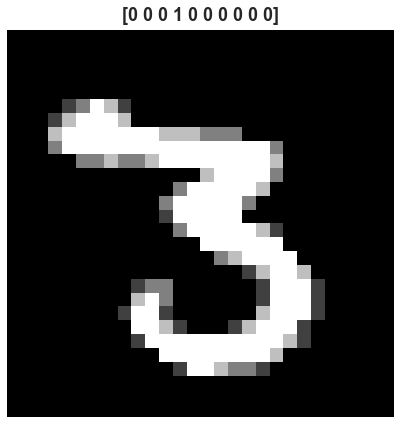

In [14]:
plt.figure(figsize=(6,6))
plt.imshow(X_val[3], cmap='gray')
plt.axis('off')
plt.title('{}'.format(y_val[3]))
plt.show();

Early stopping is used as a callback method in order to prevent overfitting and get the best # of epochs.

In [15]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=5,
    restore_best_weights=True,)

Below are some similar models, but changing # of layers, # of units. Moreover, some of them use BatchNormalization or Dropout and other not. Last two commented lines in every model's cell shows the accuracy and iterations needed to achieve that accuracy.

In [16]:
model = keras.Sequential([
    layers.Flatten(input_shape=[*X_train.shape[1:]]),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])
#0.971 val accuracy 
#62 iters


In [17]:
model = keras.Sequential([
    layers.Flatten(input_shape=[*X_train.shape[1:]]),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    #layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])
#0.9612 val accuracy 
#63 iters

In [18]:
model = keras.Sequential([
    layers.Flatten(input_shape=[*X_train.shape[1:]]),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])
#0.9694 val accuracy 
#38 iters


In [19]:
model = keras.Sequential([
    layers.Flatten(input_shape=[*X_train.shape[1:]]),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])
#0.9659 val accuracy 
#60 iters


In [20]:
model = keras.Sequential([
    layers.Flatten(input_shape=[*X_train.shape[1:]]),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])
#0.9662 val accuracy 
#53 iters

In [21]:
model = keras.Sequential([
    layers.Flatten(input_shape=[*X_train.shape[1:]]),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax'),
])
#0.976 val accuracy 
#33 iters

In [22]:
model = keras.Sequential([
    layers.Flatten(input_shape=[*X_train.shape[1:]]),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])
#0.9776 val accuracy 
#37 iters

In [23]:
model = keras.Sequential([
    layers.Flatten(input_shape=[*X_train.shape[1:]]),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])
#0.9740 val accuracy 
#36 iters

In [24]:
model = keras.Sequential([
    layers.Flatten(input_shape=[*X_train.shape[1:]]),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])
#0.9739 val accuracy 
#29 iters

In [26]:
model = keras.Sequential([
    layers.Flatten(input_shape=[*X_train.shape[1:]]),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])
#0.9745 val accuracy 
#32 iters

Adam optimizer is used due to its good performing, and the ability to auto set the learning_rate parameter. Categorical_crossentropy loss function because this is a multiclass classification problem, and labels are given in categorical arrays. Lastly, accuracy is the unique metrics used.

In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],)

Batch size is set to $2^{11}$ but it could be tuned to get the fittest one.

In [28]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=2**11,
    callbacks=[early_stopping])

Epoch 1/200
15/15 [==============================] - 11s 457ms/step - loss: 2.3310 - accuracy: 0.2885 - val_loss: 1.5661 - val_accuracy: 0.6186
Epoch 2/200
15/15 [==============================] - 5s 353ms/step - loss: 0.8923 - accuracy: 0.7185 - val_loss: 1.0372 - val_accuracy: 0.7359
Epoch 3/200
15/15 [==============================] - 5s 364ms/step - loss: 0.5438 - accuracy: 0.8405 - val_loss: 0.7584 - val_accuracy: 0.7645
Epoch 4/200
15/15 [==============================] - 5s 356ms/step - loss: 0.4055 - accuracy: 0.8881 - val_loss: 0.6018 - val_accuracy: 0.8054
Epoch 5/200
15/15 [==============================] - 5s 307ms/step - loss: 0.3225 - accuracy: 0.9075 - val_loss: 0.5065 - val_accuracy: 0.8317
Epoch 6/200
15/15 [==============================] - 5s 323ms/step - loss: 0.2804 - accuracy: 0.9195 - val_loss: 0.4812 - val_accuracy: 0.8382
Epoch 7/200
15/15 [==============================] - 5s 327ms/step - loss: 0.2334 - accuracy: 0.9349 - val_loss: 0.4083 - val_accuracy: 0.862

We convert the History object given by the fit method into Dataframe type.

In [29]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.819686,0.420782,1.566063,0.618571
1,0.795620,0.753571,1.037175,0.735873
2,0.512247,0.850918,0.758444,0.764524
3,0.386857,0.892007,0.601788,0.805397
4,0.315513,0.909558,0.506541,0.831667


Train and validation loss is plotted using the last model in the notebook. Here is where we best can see if overfitting is happening.

Minimum Validation Loss: 0.1064


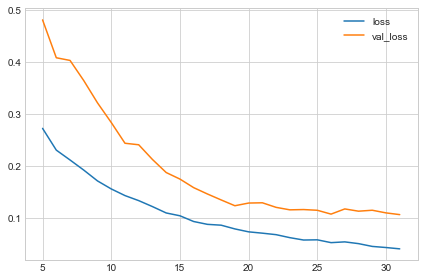

In [30]:
history_df.loc[5:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Train and validation accuracy is plotted using again the last model in the notebook.

Maximum Validation accuracy: 0.9745


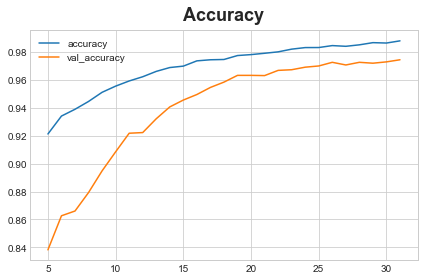

In [31]:
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot(title="Accuracy");
print(("Maximum Validation accuracy: {:0.4f}").format(history_df['val_accuracy'].max()))

We have seen some different models' performance and the conclusion is that not always more is better. That is, although you increase the # of layers or the # of units, or the dropout rate, the performance of the model might decrease due to some problems, mainly overfitting.

It's clear that using CNN's we could get a better performance cause when working with images CNN's outperform NN's in most cases.